![](logo.png)

## Day Objectives

# Decision Tree
- Decision tree is the most powerful and popular tool for classification and prediction
- A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
- A Decision tree is a flowchart like tree structure
- Used  in **data mining** for deriving a strategy to reach a particular goal, its also widely used in machine learning

**Types of Algorithms**
    - CART  - classification and regression algorithm
        - gini index/ gini impurity
        --- calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly
![](gini.png)
    - ID3  - iterative dechomister 3  
            - Information gain
            - log function / std deviation
![](entropy.png)

**Types of Decision Trees**
 Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
- **Continuous Variable Decision Tree**: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

#### Important Terminology related to Decision Trees


- **Root Node**: It represents the entire sample and this further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.


![download.jpg](download.jpg)

**Advantages**:
    - Simple to understand, interpret, visualize.
    - Decision trees implicitly perform variable screening or feature selection.
    - Can handle both numerical and categorical data. Can also handle multi-output problems.
    - Nonlinear relationships between parameters do not affect tree performance.
**DisAdvantage**:
    - OverFitting Problem
    
    
[Diabetes](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv)
    

In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Decision Tree as Classifier

In [11]:
# step 1 - select the dataset and seperate input features and target
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
X = df[["Glucose","BMI"]] # these two features are highly correlated with the target

In [14]:
y = df["Outcome"]

In [15]:
# step2 : Split the train data and testing data
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [17]:
# step 3: select required algorithm
from sklearn.tree import DecisionTreeClassifier

In [35]:
dcls =  DecisionTreeClassifier(max_depth = 3)

In [36]:
# step 4: fit your trained data
dcls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
# step 5 : predcit your data 
pred_values = dcls.predict(X_test)

In [38]:
X_train.loc[100]

Glucose    163.0
BMI         39.0
Name: 100, dtype: float64

In [39]:
y_train.loc[100]

1

In [40]:
dcls.predict([[163,39]])

array([1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_values)*100,"%")

70.56277056277057 %


In [42]:
# step 6 : visualize the tree
from sklearn import tree
import matplotlib.pyplot as plt

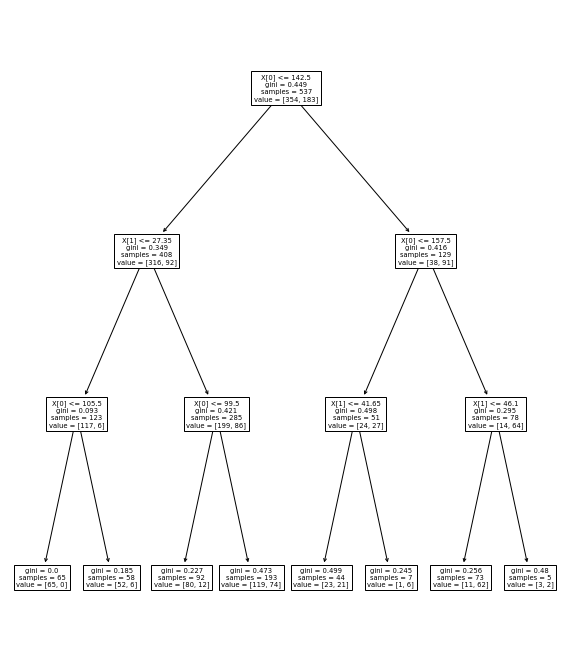

In [48]:
plt.figure(figsize = (10,12))
tree.plot_tree(dcls)
plt.show()